<a href="https://colab.research.google.com/github/haileg12/spam-email-detection/blob/main/spam_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install streamlit library
!pip install -q streamlit
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer # convert text to integer numbers
import streamlit as st

# Custom Naive Bayes Classifier
class CustomNaiveBayes:
    def __init__(self):
          self.class_probs = {}
          self.word_probs = {}
          self.FRAC_SPAM_TEXTS = 0

    def fit(self, X, y):
        # Calculate class probabilities
        self.class_probs = {label: np.mean(y == label) for label in np.unique(y)}

        # Calculate word probabilities for each class
        self.word_probs = {}
        for label in self.class_probs:
            # Select only the samples with the current label
            X_label = X[y == label]
            # Calculate word counts for this class
            word_counts = np.sum(X_label, axis=0)
            # Add Laplace smoothing (to avoid zero probabilities)
            word_probs = (word_counts + 1) / (np.sum(word_counts) + len(word_counts))
            self.word_probs[label] = word_probs
    def predict(self, X):
        predictions = []
        for x in X:
            # Calculate log probabilities
            log_probs = {}
            for label in self.class_probs:
                # Calculate the log probability of the current class
                log_prob = np.log(self.class_probs[label])
                # Multiply by the log probability of each word
                log_prob += np.sum(np.log(self.word_probs[label]) * x)
                log_probs[label] = log_prob
            # Choose the class with the highest probability
            predictions.append(max(log_probs, key=log_probs.get))
        return predictions

# def train_test_model(data_path):
#     # Data Loading and Preprocessing
#     data = pd.read_csv(data_path)
#     data.drop_duplicates(inplace=True)
#     data['label'] = data['label'].replace(['ham','spam'],['Not Spam','Spam'])
#     data['label'] = data['label'].replace([0,1],['Not Spam','Spam'])
#     mess = data['text']
#     cat = data['label']

#     # Split data into input and labels
#     x_train, x_test, y_train, y_test = train_test_split(mess, cat, test_size=0.2)

#     # Convert text data to numerical data
#     cv = CountVectorizer(stop_words='english')
#     x_train_count = cv.fit_transform(x_train)

#      # Train model
#     model = CustomNaiveBayes()
#     model.fit(x_train_count.toarray(), y_train)

#     # Test model
#     features_test = cv.transform(x_test)
#     y_pred = model.predict(features_test.toarray())

#     # Display confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()

# # Paths to datasets
# dataset_paths = [
#     "/content/drive/Shareddrives/164 Project 2024/dataset1.csv",
#     "/content/drive/Shareddrives/164 Project 2024/dataset2.csv",
#     "/content/drive/Shareddrives/164 Project 2024/dataset3.csv"
# ]

# # Train and test model for each dataset
# for path in dataset_paths:
#     train_test_model(path)



# Data Loading and Preprocessing
# Dataset 1
#data = pd.read_csv("/data/dataset1.csv")

# Dataset 2
#data = pd.read_csv("/data/dataset2.csv")

# Dataset 3
data = pd.read_csv("/data/dataset3.csv")


print(data.head()) #prints first 5 items in file
print(data.shape) # prints how many rows and columns

data.drop_duplicates(inplace=True) # deleting duplicates from the datasets, and to modify original dataset, not create a new one
#print(data.shape) # prints the row and cols
#print(data.isnull().sum()) # list # of null values in data set

print(data.head())
# change "ham" value to "not spam" in dataset
data['label'] = data['label'].replace(['ham','spam'],['Not Spam','Spam'])
data['label'] = data['label'].replace([0,1],['Not Spam','Spam'])
# and spam to Spam
print(data.head()) # print first 5


# Split data into input and labels
mess = data['text']
cat = data['label']

# 80 percent train and 20 percent test ## COMBINED HAILE & DALVIR CODE
(x_train, x_test, y_train, y_test) = train_test_split(mess, cat, test_size=0.2)

# Need to convert string data to decimal data to feed into model
cv = CountVectorizer(stop_words='english') # repeated words filtered from the data (and, or, the)
x_train_count = cv.fit_transform(x_train) # converting training data into numerical data


# Model
model = CustomNaiveBayes()
model.fit(x_train_count.toarray(), y_train)


# Test model
features_test = cv.transform(x_test)
accuracy = np.mean(model.predict(features_test.toarray()) == y_test)


# Preprocess the email text
def preprocess_email(email_text):
    # Lowercase the text and remove punctuation
    processed_email = email_text.lower().translate(str.maketrans('', '', string.punctuation))
    return processed_email


# Print accuracy
print("Accuracy:", accuracy)

# Example email text
example_email = "Congratulations! You've won a free vacation. Click here to claim your prize."
# Preprocess the example email text
processed_email = preprocess_email(example_email)
# Convert the preprocessed email text into numerical data
email_count = cv.transform([processed_email]).toarray()
email2 = 'URGENT: Your account needs verification. Click the link to avoid suspension."'
# Preprocess the example email text
processed_email = preprocess_email(email2)
# Convert the preprocessed email text into numerical data
email2_count = cv.transform([processed_email]).toarray()
email3 = 'We are delighted to extend a personal invitation to you for an exclusive networking event hosted by Harriet Union Inc. on April 24th at Golden Palace. This event brings together top industry leaders and influencers for an evening of insightful discussions, valuable connections, and gourmet dining'
# Preprocess the example email text
processed_email = preprocess_email(email3)
# Convert the preprocessed email text into numerical data
email3_count = cv.transform([processed_email]).toarray()
email4 = "Subject: Elevate Your Lifestyle with Exclusive Offerings! Dear esteemed guest, As a distinguished individual of refined taste, you're invited to indulge in a world of unparalleled luxury. From exquisite timepieces to lavish experiences, our curated selection awaits you. Access bespoke concierge services and redefine opulence today. Reply for more details."
processed_email = preprocess_email(email4)
email4_count = cv.transform([processed_email]).toarray()

# Run prediction
prediction = model.predict(email_count)
print("Prediction for the email 1:", prediction)
prediction = model.predict(email2_count)
print("Prediction for the email 2:", prediction)
prediction = model.predict(email3_count)
print("Prediction for the email 3:", prediction)
prediction = model.predict(email4_count)
print("Prediction for the email 4:", prediction)

# Using streamlit for user interaction
st.title("Spam Detection")

email_input = st.text_area("Enter your message here:")

if st.button("Validate"):
    if email_input:
        # Preprocess the input email
        processed_email = preprocess_email(email_input)
        # Convert the preprocessed email text into numerical data
        email_count = cv.transform([processed_email]).toarray()
        # Run prediction
        prediction = model.predict(email_count)
        if prediction[0] == "Spam":
          st.write("This is spam.")
        else:
          st.write("This is not spam.")
    else:
        st.warning("Please enter an email text.")


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
      label                                               text
0  Not Spam  Go until jurong point, crazy.. Available only ...
1  Not Spam                      Ok lar... Joking wif u oni...
2      Spam  Free entry in 2 a wkly comp to win FA Cup fina...
3  Not Spam  U dun say so earl

In [ ]:
# Example email text
example_email = "Hi, Just a friendly reminder about our upcoming team meeting scheduled for [Date] at [Time]. We'll be discussing [Agenda]. Please make sure to attend on time. Thanks."
# Preprocess the example email text
processed_email = preprocess_email(example_email)
# Convert the preprocessed email text into numerical data
email_count = cv.transform([processed_email]).toarray()
email2 = "Hi, Thank you for your recent purchase from Macy's. Your order #[Order Number] has been confirmed. You can expect delivery within 3-5pm .If you have any questions or concerns, feel free to contact our customer support team. Regards, Youth Team"
# Preprocess the example email text
processed_email = preprocess_email(email2)
# Convert the preprocessed email text into numerical data
email2_count = cv.transform([processed_email]).toarray()
email3 = "Hi Lisa, You're invited to join us at our networking event on Tuesday at 2pm at Rida Palace. This event is an excellent opportunity to connect with industry professionals and expand your network. Please RSVP by Monday. We look forward to seeing you there! Best regards, Ocean Waters Inc."
# Preprocess the example email text
processed_email = preprocess_email(email3)
# Convert the preprocessed email text into numerical data
email3_count = cv.transform([processed_email]).toarray()
email4 = "Subject: Update from Grandma Hi Jim, I hope this email finds you well. I just wanted to check in and see how you're doing. It's been a while since we last caught up, and I've been thinking about you a lot lately. Things have been pretty busy on my end. I've been spending more time in the garden, and the flowers are starting to bloom beautifully. I also recently tried out a new recipe for apple pie, and it turned out delicious! I wish I could share a slice with you. Speaking of which, I was thinking it's been too long since we had a family get-together. How about we plan something for next month? Maybe a barbecue at the park or a picnic by the lake? Let me know what you think. Anyway, I just wanted to say hello and send you some love. Take care of yourself, and don't hesitate to reach out if you need anything. Sending hugs, Granny Joe"
processed_email = preprocess_email(email4)
email4_count = cv.transform([processed_email]).toarray()

# Run prediction
prediction = model.predict(email_count)
print("Prediction for the email 1:", prediction)
prediction = model.predict(email2_count)
print("Prediction for the email 2:", prediction)
prediction = model.predict(email3_count)
print("Prediction for the email 3:", prediction)
prediction = model.predict(email4_count)
print("Prediction for the email 4:", prediction)


Prediction for the email 1: ['Not Spam']
Prediction for the email 2: ['Spam']
Prediction for the email 3: ['Not Spam']
Prediction for the email 4: ['Not Spam']


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.21.15:8501

  Stopping...
^C


# Results and Datasets

Tested Files:

Dataset 1: https://www.kaggle.com/datasets/abdmental01/email-spam-dedection?resource=download

**Accuracy: 0.9903100775193798**

Accuracy: 0.9777131782945736

Accuracy: 0.9835271317829457

Tested on new model:

Dataset 2 https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data

**Accuracy: 0.977977977977978**

Accuracy: 0.974974974974975

Accuracy: 0.982982982982983

New Datasets to test on (spam/not spam):

Dataset 3: https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset

Accuracy: 0.9894644424934153

**Accuracy: 0.9929762949956101**

Accuracy: 0.9920983318700615

Phishing emails try to run on it:
https://www.kaggle.com/datasets/subhajournal/phishingemails

Another kaggle model to test again (if time):
https://www.kaggle.com/code/mfaisalqureshi/email-spam-detection-98-accuracy

     Dataset    Run  Accuracy
0  Dataset 1  Run 1  0.977132
1  Dataset 1  Run 2  0.990310
2  Dataset 1  Run 3  0.983527
3  Dataset 2  Run 1  0.977978
4  Dataset 2  Run 2  0.974975
5  Dataset 2  Run 3  0.982983
6  Dataset 3  Run 1  0.989464
7  Dataset 3  Run 2  0.992976
8  Dataset 3  Run 3  0.992098


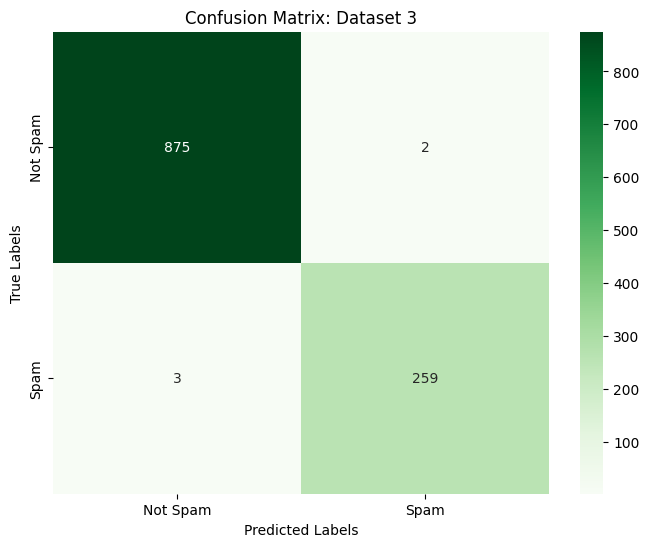

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example results (replace with your actual results)
results = {
    'Dataset': ['Dataset 1'] * 3 + ['Dataset 2'] * 3 + ['Dataset 3'] * 3,
    'Run': ['Run 1', 'Run 2', 'Run 3'] * 3,
    'Accuracy': [0.977131782945736, 0.9903100775193798, 0.9835271317829457,  0.977977977977978, 0.974974974974975, 0.982982982982983, 0.9894644424934153, 0.9929762949956101, 0.9920983318700615],
    # Add more metrics as needed
}

# Create DataFrame
df = pd.DataFrame(results)

# Display DataFrame
print(df)

# Get predictions for the test set
predictions_test = model.predict(features_test.toarray())

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_test)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Dataset 3')
plt.show()


 POTENTIAL PLANS IN THE FUTURE:

1. **Data Augmentation**: Expand the dataset by introducing variations of existing spam and legitimate emails. This can involve modifying the text slightly, adding noise, or using techniques like back-translation for generating synthetic data.

3. **Advanced Algorithms**: Experiment with more sophisticated machine learning algorithms or neural network architectures. Techniques like deep learning, ensemble methods, or gradient boosting can potentially improve classification performance.

5. **Cross-Validation**: Implement cross-validation techniques to better assess the model's generalization performance. This involves splitting the data into multiple subsets for training and testing to ensure the model is robust across different samples.

8. **Regularization**: Apply regularization techniques to prevent overfitting and improve the model's generalization ability. Techniques like dropout, L1/L2 regularization, or early stopping can help prevent the model from memorizing noise in the training data.

10. **Feedback Loop**: Implement a feedback mechanism where the model learns from misclassifications and user feedback. This can involve retraining the model periodically with new labeled data to adapt to evolving spamming techniques.
